 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [39]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import csv
import seaborn as sns


%matplotlib inline

In [40]:
# This the current working directory (cwd)
print(os.getcwd()) 


/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [41]:
# Reading whale returns
w_r ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/whale_returns.csv'
whale_returns = pd.read_csv(w_r)
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [42]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [43]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [44]:
# Reading algorithmic returns
a_r ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/algo_returns.csv'
algo_returns = pd.read_csv(a_r)
algo_returns.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [45]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [46]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [47]:
# Reading S&P 500 Closing Prices
s_p ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/sp500_history.csv'
sp500_history = pd.read_csv(s_p)
sp500_history.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [48]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [49]:
# Set the date as the index to the DataFrame

sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [50]:
# Drop the extra date column

sp500_history.drop(columns=['Date'], inplace=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [51]:
# Clean identified numeric fields with $ symbol

sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"]

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [52]:
# Fix Data Types int column "close"

sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [53]:
# Calculate Daily Returns Option using pct_change funtion 

sp500_returns = sp500_history.pct_change()
sp500_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [54]:
# Calculate Daily Returns Option using shift funtion 

sp500_returns = (sp500_history - sp500_history.shift(1)) / sp500_history
sp500_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008841
2019-04-18,-0.001012
2019-04-17,-0.001579
2019-04-16,0.002274
...,...
2012-10-05,0.003457
2012-10-04,0.000322
2012-10-03,-0.007174


In [55]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns

,Close
Date,
2019-04-22,-0.008841
2019-04-18,-0.001012
2019-04-17,-0.001579
2019-04-16,0.002274
2019-04-15,-0.000509
...,...
2012-10-05,0.003457
2012-10-04,0.000322
2012-10-03,-0.007174


In [56]:
# Rename `Close` Column to be specific to this portfolio.

sp500_returns = sp500_returns.rename(columns={
    "Daily_Return": "SP500"
})

sp500_returns.head()

,Close
Date,
2019-04-22,-0.008841
2019-04-18,-0.001012
2019-04-17,-0.001579
2019-04-16,0.002274
2019-04-15,-0.000509


In [57]:
# Set the date as the index to the algo_returns DataFrame

algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)

algo_returns.drop(columns=['Date'], inplace=True)

algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [58]:
# Set the date as the index to the whale_return DataFrame

whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)

whale_returns.drop(columns=['Date'], inplace=True)

whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Combine Whale, Algorithmic, and S&P 500 Returns

In [59]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_porfolio = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_porfolio.sort_index(inplace=True)

combined_porfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004389
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001196
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014174
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003944
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.016961


In [104]:
combined_porfolio = combined_porfolio.rename(columns={
    "Close": "SP500"
})

combined_porfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004389
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001196
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014174
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003944
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.016961


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

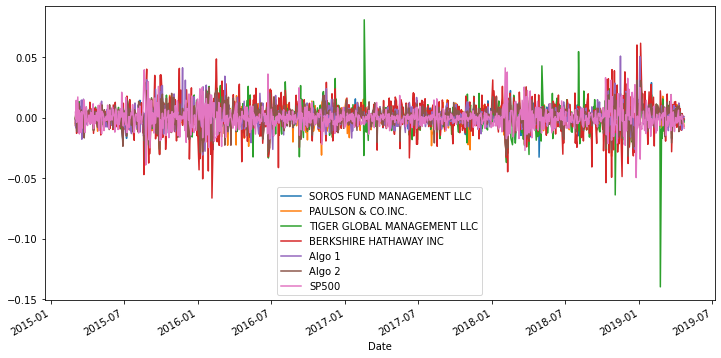

In [105]:
# Plot daily returns of all portfolios
combined_porfolio.plot(figsize=(12,6))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

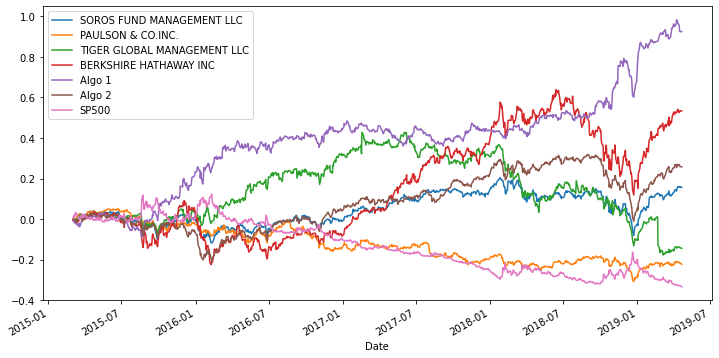

In [106]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_porfolio).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(12,6))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

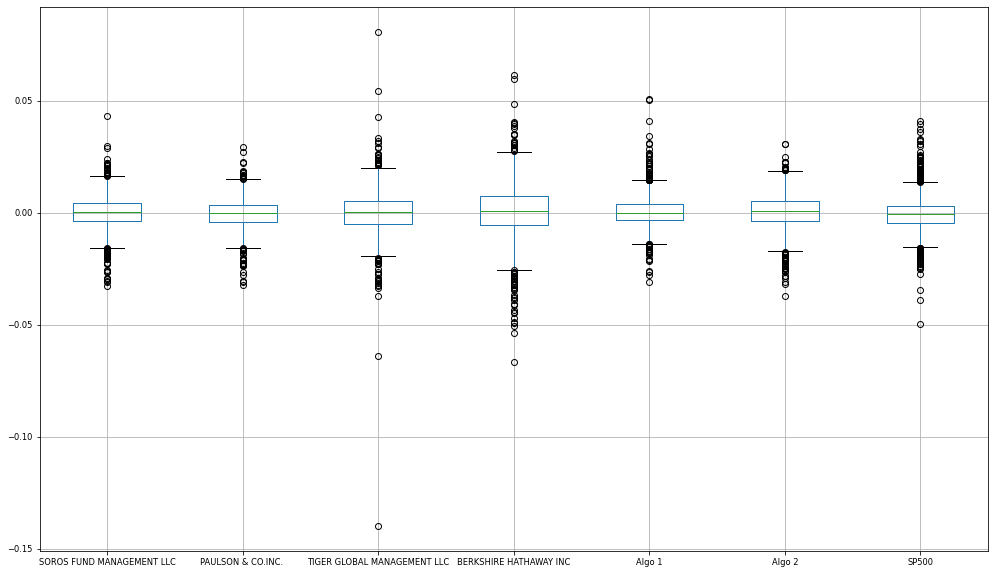

In [243]:
### Create a box plot for each portfolio

boxplot = combined_porfolio.boxplot(fontsize='small', figsize=(17,10))

In [107]:
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      10.784333
PAULSON & CO.INC.             -22.231926
TIGER GLOBAL MANAGEMENT LLC    15.724849
BERKSHIRE HATHAWAY INC         10.472499
Algo 1                         26.606482
Algo 2                         10.463945
SP500                         -16.679080
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

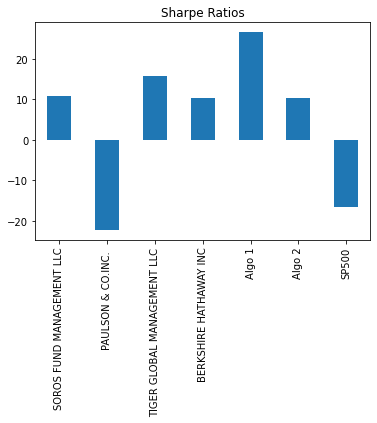

In [108]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
# Variables

aapl_historical ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/aapl_historical.csv'
cost_historical ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/cost_historical.csv'
goog_historical ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/goog_historical.csv'


In [63]:
# Read the APPLE Historical Closing Prices

aapl = pd.read_csv(
    aapl_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
aapl.sort_index(inplace=True)
aapl.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


<AxesSubplot:xlabel='Trade DATE'>

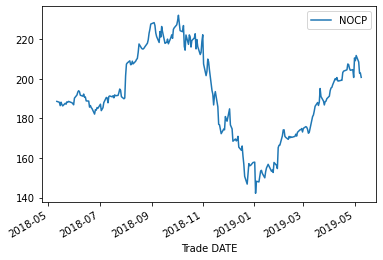

In [64]:
# Box plot to visually AAPL show risk
aapl.plot()

In [65]:
# Read the Costco Historical Closing Prices

cost = pd.read_csv(
    cost_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
cost.sort_index(inplace=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


<AxesSubplot:xlabel='Trade DATE'>

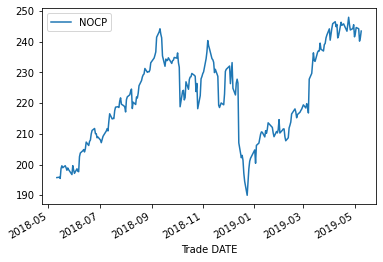

In [66]:
# Box plot to visually COST show risk

cost.plot()

In [67]:
# Read the Google Historical Closing Prices

goog = pd.read_csv(
    goog_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
goog.sort_index(inplace=True)
goog.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


<AxesSubplot:xlabel='Trade DATE'>

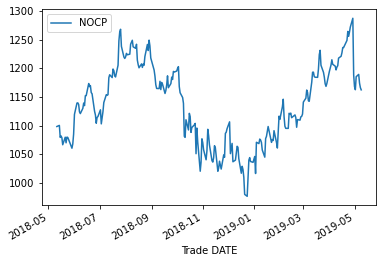

In [68]:
# Box plot to visually Google show risk

goog.plot()

In [69]:
# To calculate portfolio returns, each stock's closing prices are added as a column to the final portfolio DataFrame.

all_prices = pd.concat([aapl, cost, goog], axis="rows", join="inner")
all_prices = all_prices.reset_index()
all_prices.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,AAPL,188.59
1,2018-05-14,AAPL,188.15
2,2018-05-15,AAPL,186.44
3,2018-05-16,AAPL,188.18
4,2018-05-17,AAPL,186.99


In [70]:
# Create a new pivot table where the columns are the closing prices for each ticker

all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [71]:
# Calculate Daily Returns
all_returns = all_prices.pct_change()
all_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [72]:
# Drop nulls
all_returns.dropna(inplace=True)
all_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


### Calculate Standard Deviations

<AxesSubplot:xlabel='Symbol'>

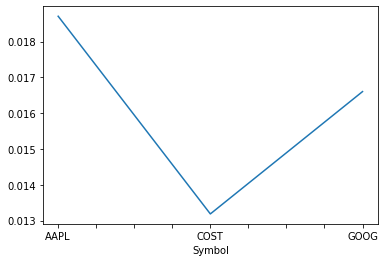

In [73]:
# Calculate the daily standard deviations of all portfolios
all_returns.std().plot()


### Determine which portfolios are riskier than the S&P 500

In [98]:
# Calculate  the daily standard deviation of S&P 500
sp_std = sp500_returns.std()
sp_std
# Determine which portfolios are riskier than the S&P 500
#The riskier porfolio compared with S&P 500 is APPPLE, the standard deviation is high, meaning an investment will be risky.


Close    0.008111
dtype: float64

### Calculate the Annualized Standard Deviation

In [75]:
# Calculate the annualized standard deviation (252 trading days)
annualized = all_returns.std() * np.sqrt(252)
annualized

Symbol
AAPL    0.296955
COST    0.209320
GOOG    0.263554
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

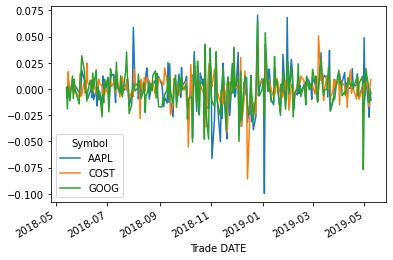

In [248]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns.rolling(window=21).mean()

# Plot the rolling standard deviation
all_returns.plot()

<AxesSubplot:xlabel='Date'>

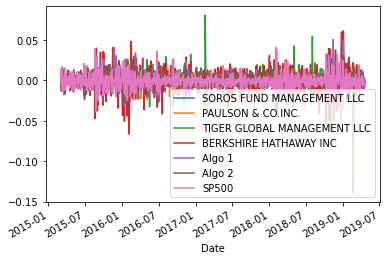

In [258]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_porfolio.rolling(window=21).std()

# Plot the rolling standard deviation
combined_porfolio.plot()

### Calculate and plot the correlation

<AxesSubplot:>

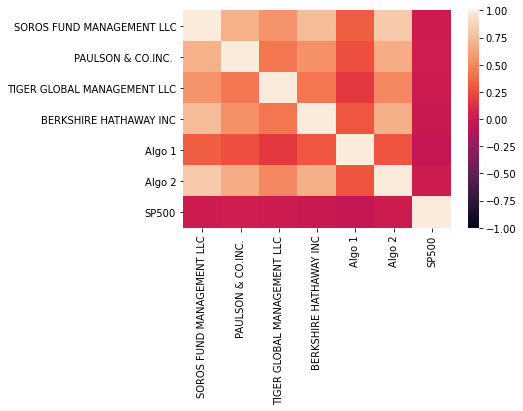

In [244]:
# Calculate the correlation

price_correlation_pro = combined_porfolio.corr()

# Display de correlation matrix
sns.heatmap(price_correlation_pro, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [78]:
# Calculate covariance of a single portfolio

covariance = all_returns['AAPL'].cov(all_returns['AAPL'])
covariance


0.000349930715144651

In [79]:
# Calculate variance of S&P 500
variance = sp500_returns['Close'].var()
variance


6.579270583158732e-05

In [80]:
# Computing beta
aapl_beta = covariance / variance
aapl_beta


5.3186855704093565

<AxesSubplot:title={'center':'Rolling 30-Day Beta of AAPL'}, xlabel='Trade DATE'>

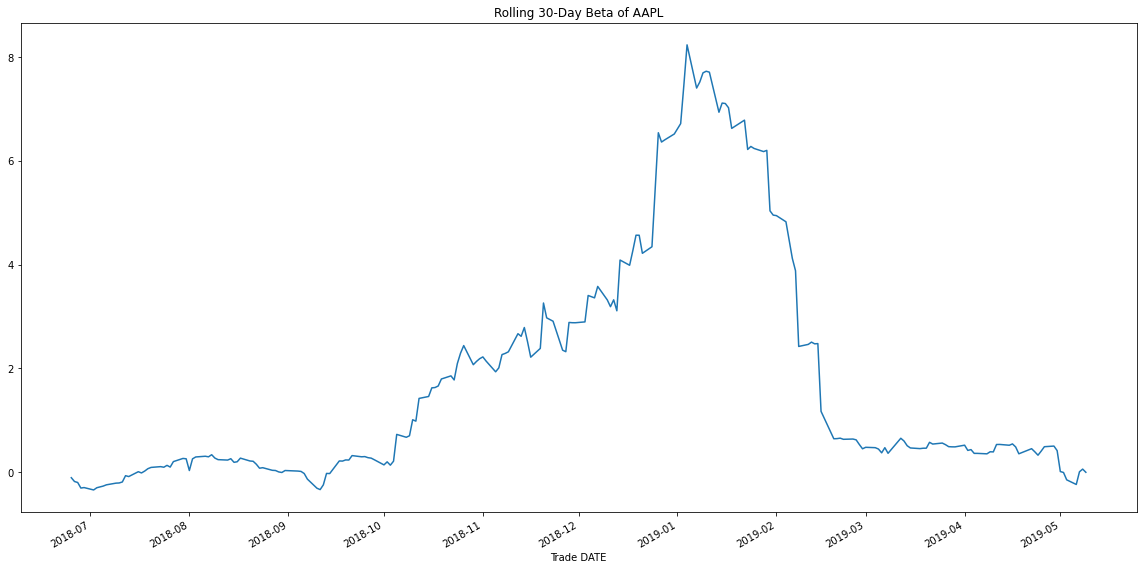

In [88]:
# Calculate 30-day rolling beta of AAPL and plot the data

rolling_beta = rolling_covariance / variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of AAPL')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

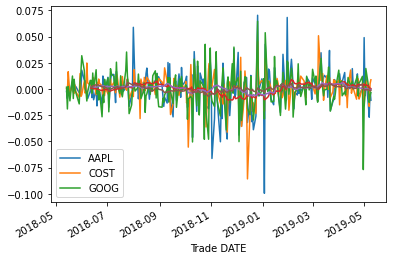

In [89]:
# Use `ewm` to calculate the rolling window

# Set figure of the daily closing prices of All Returns
ax = all_returns.plot()

# Plot 21-Day Rolling Mean on the same figure
all_returns.rolling(window=21).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["AAPL", "COST", "GOOG"]);


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [100]:
# Annualized Sharpe Ratios

sharpe_ratios = (all_returns.mean() * 252) / (annualized * np.sqrt(252))
sharpe_ratios

Symbol
AAPL    0.022760
COST    0.073103
GOOG    0.022026
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}, xlabel='Symbol'>

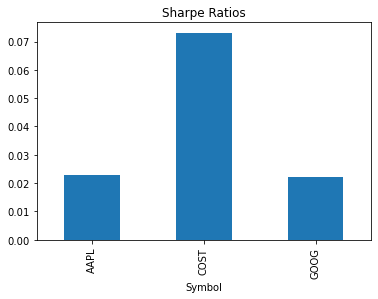

In [101]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

PAULSON & CO.INC. and SP500 are risky comapre with other stocks, whales porfolio has better returnd compare with SP500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [212]:
# Reading data from 1st stock
msft ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/msft_historical.csv'
msft = pd.read_csv(msft)
msft.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/26/2021,$236.48,25479850,$231.55,$236.71,$231.55
1,03/25/2021,$232.34,34061850,$235.3,$236.94,$231.57
2,03/24/2021,$235.46,25620130,$237.845,$238,$235.32
3,03/23/2021,$237.58,31638380,$237.485,$241.05,$237.07
4,03/22/2021,$235.99,30127010,$230.27,$236.9,$230.14


In [213]:
#Rename column and delete columns

msft = msft.rename(columns={
    "Close/Last": "MSFT"
})
msft = msft.rename(columns={
    "Date": "DATE"
})

msft = msft.drop(columns=["Volume", "Open", "High", "Low"])  
msft.head()

,DATE,MSFT
0,03/26/2021,$236.48
1,03/25/2021,$232.34
2,03/24/2021,$235.46
3,03/23/2021,$237.58
4,03/22/2021,$235.99


In [214]:
# Reading data from 2nd stock
sq ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/sq_historical.csv'
sq = pd.read_csv(sq)
sq.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/26/2021,$213.6,9196199,$209.32,$216.79,$203.96
1,03/25/2021,$208.47,12878860,$204.6,$211.96,$202.1
2,03/24/2021,$213.51,9262534,$224.3,$225.9,$212.155
3,03/23/2021,$223.2,5591488,$226.39,$228.38,$221.49
4,03/22/2021,$226.13,6386095,$225.24,$230.18,$221.74


In [215]:
#rename SQ column and delete columns
sq = sq.rename(columns={
    "Close/Last": "SQ"
})
sq = sq.drop(columns=["Volume", "Open", "High", "Low"])  
sq.head()

,Date,SQ
0,03/26/2021,$213.6
1,03/25/2021,$208.47
2,03/24/2021,$213.51
3,03/23/2021,$223.2
4,03/22/2021,$226.13


In [216]:
# Reading data from 3rd stock
shop ='/Users/jc/Desktop/FinTech/Homework_Pandas/Instructions/Starter_Code/Resources/shop_historical.csv'
shop = pd.read_csv(shop)
shop.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/26/2021,$1065.21,2840193,$1052.6,$1084.98,$1005.14
1,03/25/2021,$1061.68,1768208,$1090.08,$1103.99,$1051.2501
2,03/24/2021,$1106.01,1070782,$1176.81,$1185,$1102.35
3,03/23/2021,$1162,896658,$1165,$1168.47,$1142.3
4,03/22/2021,$1160,904072,$1123.14,$1160.83,$1120.38


In [217]:
#rename Shop column and delete columns
shop = shop.rename(columns={
    "Close/Last": "SHOP"
})
shop = shop.drop(columns=["Volume", "Open", "High", "Low"])  
shop.head()

,Date,SHOP
0,03/26/2021,$1065.21
1,03/25/2021,$1061.68
2,03/24/2021,$1106.01
3,03/23/2021,$1162
4,03/22/2021,$1160


In [218]:
# Combine all stocks in a single DataFrame

jc_porfolio = pd.concat([msft, sq, shop], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_porfolio.sort_index(inplace=True)

jc_porfolio = jc_porfolio.drop(columns=["Date"])  

jc_porfolio.head()


,DATE,MSFT,SQ,SHOP
0,03/26/2021,$236.48,$213.6,$1065.21
1,03/25/2021,$232.34,$208.47,$1061.68
2,03/24/2021,$235.46,$213.51,$1106.01
3,03/23/2021,$237.58,$223.2,$1162
4,03/22/2021,$235.99,$226.13,$1160


In [219]:
# Reset Date index
jc_porfolio.set_index(pd.to_datetime(jc_porfolio['DATE'], infer_datetime_format=True), inplace=True)

jc_porfolio.drop(columns=['DATE'], inplace=True)

In [220]:
# Reorganize portfolio data by having a column per symbol
jc_porfolio.head()

,MSFT,SQ,SHOP
DATE,,,
2021-03-26,$236.48,$213.6,$1065.21
2021-03-25,$232.34,$208.47,$1061.68
2021-03-24,$235.46,$213.51,$1106.01
2021-03-23,$237.58,$223.2,$1162
2021-03-22,$235.99,$226.13,$1160


In [221]:
# Clean identified numeric fields with $ symbol

jc_porfolio["MSFT"] = jc_porfolio["MSFT"].str.replace("$", "")
jc_porfolio["MSFT"]

jc_porfolio["SQ"] = jc_porfolio["SQ"].str.replace("$", "")
jc_porfolio["SQ"]

jc_porfolio["SHOP"] = jc_porfolio["SHOP"].str.replace("$", "")
jc_porfolio["SHOP"]

jc_porfolio.head()

,MSFT,SQ,SHOP
DATE,,,
2021-03-26,236.48,213.6,1065.21
2021-03-25,232.34,208.47,1061.68
2021-03-24,235.46,213.51,1106.01
2021-03-23,237.58,223.2,1162
2021-03-22,235.99,226.13,1160


In [222]:
# Convert Strings to Floats
jc_msft = pd.to_numeric(jc_porfolio["MSFT"], downcast="float")
jc_msft

DATE
2021-03-26    236.479996
2021-03-25    232.339996
2021-03-24    235.460007
2021-03-23    237.580002
2021-03-22    235.990005
                 ...    
2020-04-02    155.259995
2020-04-01    152.110001
2020-03-31    157.710007
2020-03-30    160.229996
2020-03-27    149.699997
Name: MSFT, Length: 252, dtype: float32

In [210]:
jc_sq = pd.to_numeric(jc_porfolio["SQ"], downcast="float")
jc_sq

DATE
2021-03-26    213.600006
2021-03-25    208.470001
2021-03-24    213.509995
2021-03-23    223.199997
2021-03-22    226.130005
                 ...    
2020-04-02     45.880001
2020-04-01     46.810001
2020-03-31     52.380001
2020-03-30     55.000000
2020-03-27     53.340000
Name: SQ, Length: 252, dtype: float32

In [211]:
jc_shop = pd.to_numeric(jc_porfolio["SHOP"], downcast="float")
jc_shop

DATE
2021-03-26    1065.209961
2021-03-25    1061.680054
2021-03-24    1106.010010
2021-03-23    1162.000000
2021-03-22    1160.000000
                 ...     
2020-04-02     346.299988
2020-04-01     384.670013
2020-03-31     416.929993
2020-03-30     430.380005
2020-03-27     421.619995
Name: SHOP, Length: 252, dtype: float32

In [279]:
# Combine Porfolios
jc_all = pd.concat([jc_msft, jc_sq, jc_shop], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_porfolio.sort_index(inplace=True)
  
jc_all.head()

,MSFT,SQ,SHOP
DATE,,,
2021-03-26,236.479996,213.600006,1065.209961
2021-03-25,232.339996,208.470001,1061.680054
2021-03-24,235.460007,213.509995,1106.010010
2021-03-23,237.580002,223.199997,1162.000000
2021-03-22,235.990005,226.130005,1160.000000


In [280]:
all_returns = jc_all.pct_change()
all_returns.head()

,MSFT,SQ,SHOP
DATE,,,
2021-03-26,NaN,NaN,NaN
2021-03-25,-0.017507,-0.024017,-0.003314
2021-03-24,0.013429,0.024176,0.041754
2021-03-23,0.009004,0.045384,0.050623
2021-03-22,-0.006692,0.013127,-0.001721


In [281]:
# Calculate daily returns
daily_returns = (all_returns - all_returns.shift(1)) / all_returns

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns

,MSFT,SQ,SHOP
DATE,,,
2021-03-24,2.303685,1.993412,1.079365
2021-03-23,-0.491473,0.467302,0.175194
2021-03-22,2.345339,-2.457237,30.412661
2021-03-19,0.719972,3.301142,0.948873
2021-03-18,15.879174,-1.375326,-8.801552
...,...,...,...
2020-04-02,8.446268,3.689663,-1.808825
2020-04-01,1.458187,-1.437335,1.286417
2020-03-31,1.551086,0.829650,-0.321184


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [282]:
all_returns.head()

,MSFT,SQ,SHOP
DATE,,,
2021-03-26,NaN,NaN,NaN
2021-03-25,-0.017507,-0.024017,-0.003314
2021-03-24,0.013429,0.024176,0.041754
2021-03-23,0.009004,0.045384,0.050623
2021-03-22,-0.006692,0.013127,-0.001721


In [284]:
# Drop NAs
all_returns = all_returns.dropna()
all_returns.head()

,MSFT,SQ,SHOP
DATE,,,
2021-03-25,-0.017507,-0.024017,-0.003314
2021-03-24,0.013429,0.024176,0.041754
2021-03-23,0.009004,0.045384,0.050623
2021-03-22,-0.006692,0.013127,-0.001721
2021-03-19,-0.023899,-0.005705,-0.033664


In [271]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_returns.dot(weights).to_frame()
portfolio_return.columns = ['portfolio']

# Display sample data
portfolio_returns.head()


Exception: Dot product shape mismatch, (248,) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [285]:
# Join your returns DataFrame to the original returns DataFrame

join_all_returns = pd.concat([combined_porfolio, all_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
join_all_returns.sort_index(inplace=True)
  
join_all_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,MSFT,SQ,SHOP


In [287]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_all_returns.count()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
MSFT                           0
SQ                             0
SHOP                           0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [290]:
# Calculate the annualized `std`

daily_returns_std = join_all_returns.std()
annualized_std = daily_returns_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
SP500                         NaN
MSFT                          NaN
SQ                            NaN
SHOP                          NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

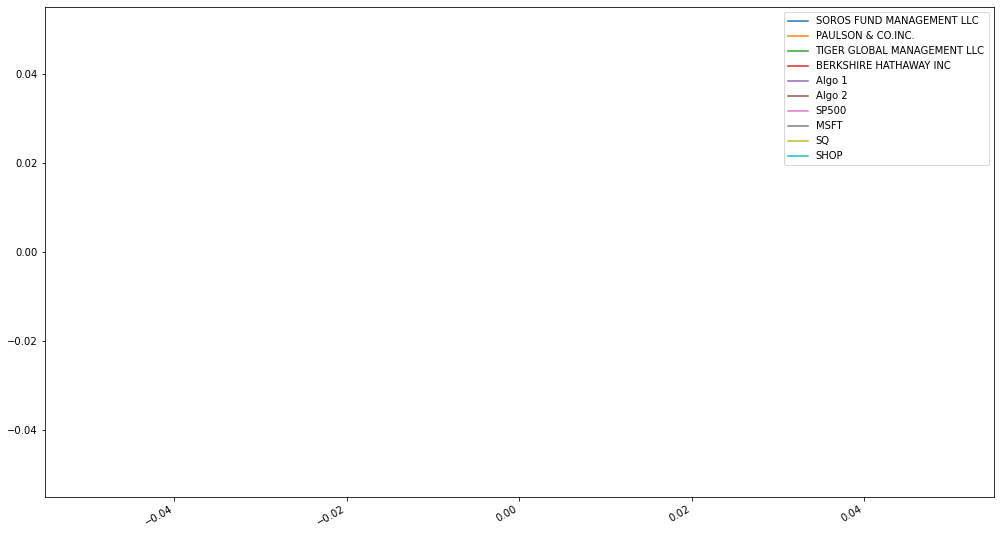

In [291]:
# Calculate rolling standard deviation
rolling_std = join_all_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(17,10))

### Calculate and plot the correlation

<AxesSubplot:>

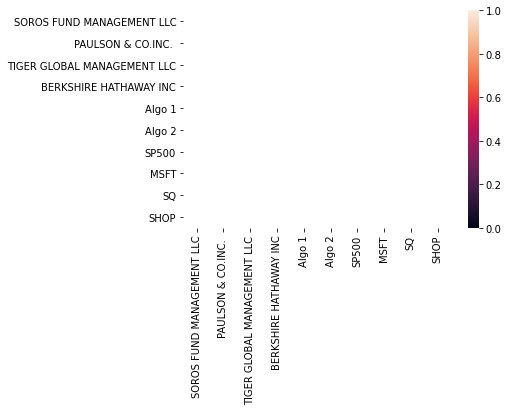

In [293]:
# Calculate and plot the correlation

correllation = join_all_returns.corr()

sns.heatmap(correllation, vmin=0, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [299]:
# Calculate and plot Beta

covariance_all = join_all_returns['SP500'].cov(join_all_returns['SP500'])
covariance_all

variance_all = sp500_returns['Close'].var()
variance_all

all_beta = covariance_all / variance_all
all_beta

rolling_beta_all = covariance_all / variance_all
rolling_beta_all.plot(figsize=(20, 10), title='Rolling 60-Day Beta compared to the S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [295]:
# Calculate Annualzied Sharpe Ratios

all_sharpe_ratios = (join_all_returns.mean() * 252) / (join_all_returns.std() * np.sqrt(252))

all_sharpe_ratios

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
SP500                         NaN
MSFT                          NaN
SQ                            NaN
SHOP                          NaN
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios'}>

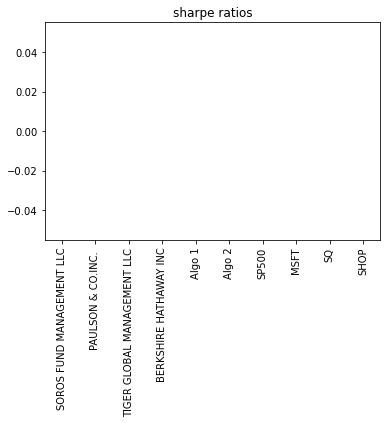

In [296]:
# Visualize the sharpe ratios as a bar plot

all_sharpe_ratios.plot(kind="bar", title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!